In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, diff, Function
import sympy as sp

In [6]:
# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")
dtheta1, dtheta2, dtheta3, dtheta4, dtheta5 = symbols("dtheta1 dtheta2 dtheta3 dtheta4 dtheta5")
ddtheta1, ddtheta2, ddtheta3, ddtheta4, ddtheta5 = symbols("ddtheta1 ddtheta2 ddtheta3 ddtheta4 ddtheta5")
t = symbols('t')

In [7]:
# DH Parameters
d1, a1, alpha1 = 0.1, 0, pi / 2
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, pi / 2
d5, a5, alpha5 = 0.1, 0, 0

# Mass and inertia properties
m1, m2, m3, m4, m5 = 1.0, 1.0, 1.0, 1.0, 1.0
I1, I2, I3, I4, I5 = symbols("I1 I2 I3 I4 I5")
g = 9.81

In [8]:

# Define the transformation matrix using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix(
        [
            [
                cos(theta),
                -sin(theta) * cos(alpha),
                sin(theta) * sin(alpha),
                a * cos(theta),
            ],
            [
                sin(theta),
                cos(theta) * cos(alpha),
                -cos(theta) * sin(alpha),
                a * sin(theta),
            ],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1],
        ]
    )

In [9]:
# Define joint angles as functions of time
theta1_t = Function('theta1')(t)
theta2_t = Function('theta2')(t)
theta3_t = Function('theta3')(t)
theta4_t = Function('theta4')(t)
theta5_t = Function('theta5')(t)

In [10]:
# Transformation matrices for each link
T1 = DH_matrix(theta1_t, d1, a1, alpha1)
T2 = DH_matrix(theta2_t, d2, a2, alpha2)
T3 = DH_matrix(theta3_t, d3, a3, alpha3)
T4 = DH_matrix(theta4_t, d4, a4, alpha4)
T5 = DH_matrix(theta5_t, d5, a5, alpha5)

In [11]:
T01 = T1
T02 = T01 * T2
T03 = T02 * T3
T04 = T03 * T4
T05 = T04 * T5

In [12]:
# Position vectors of the centers of mass
p1 = T01[:3, 3] / 2
p2 = T02[:3, 3] / 2
p3 = T03[:3, 3] / 2
p4 = T04[:3, 3] / 2
p5 = T05[:3, 3] / 2

# Velocity of the centers of mass
v1 = diff(p1, t)
v2 = diff(p2, t)
v3 = diff(p3, t)
v4 = diff(p4, t)
v5 = diff(p5, t)

In [13]:
# Kinetic Energy
K1 = 0.5 * m1 * v1.dot(v1) + 0.5 * I1 * (diff(theta1_t, t))**2
K2 = 0.5 * m2 * v2.dot(v2) + 0.5 * I2 * (diff(theta2_t, t))**2
K3 = 0.5 * m3 * v3.dot(v3) + 0.5 * I3 * (diff(theta3_t, t))**2
K4 = 0.5 * m4 * v4.dot(v4) + 0.5 * I4 * (diff(theta4_t, t))**2
K5 = 0.5 * m5 * v5.dot(v5) + 0.5 * I5 * (diff(theta5_t, t))**2

K = K1 + K2 + K3 + K4 + K5

In [14]:
# Potential Energy
P1 = m1 * g * p1[2]
P2 = m2 * g * p2[2]
P3 = m3 * g * p3[2]
P4 = m4 * g * p4[2]
P5 = m5 * g * p5[2]

P = P1 + P2 + P3 + P4 + P5

In [15]:
# Lagrangian
L = K - P


In [16]:
# Euler-Lagrange equations
EL1 = diff(diff(L, diff(theta1_t, t)), t) - diff(L, theta1_t)
EL2 = diff(diff(L, diff(theta2_t, t)), t) - diff(L, theta2_t)
EL3 = diff(diff(L, diff(theta3_t, t)), t) - diff(L, theta3_t)
EL4 = diff(diff(L, diff(theta4_t, t)), t) - diff(L, theta4_t)
EL5 = diff(diff(L, diff(theta5_t, t)), t) - diff(L, theta5_t)

In [17]:
# Solve for torques
tau1 = EL1.simplify()
tau2 = EL2.simplify()
tau3 = EL3.simplify()
tau4 = EL4.simplify()
tau5 = EL5.simplify()

# Display the equations
tau1, tau2, tau3, tau4, tau5

(1.0*I1*Derivative(theta1(t), (t, 2)) - 0.025*sin(theta2(t) + theta3(t))*sin(theta2(t) + theta3(t) + theta4(t))*sin(theta1(t))**2*Derivative(theta1(t), t)*Derivative(theta2(t), t) - 0.025*sin(theta2(t) + theta3(t))*sin(theta2(t) + theta3(t) + theta4(t))*sin(theta1(t))**2*Derivative(theta1(t), t)*Derivative(theta3(t), t) - 0.025*sin(theta2(t) + theta3(t))*sin(theta2(t) + theta3(t) + theta4(t))*cos(theta1(t))**2*Derivative(theta1(t), t)*Derivative(theta2(t), t) - 0.025*sin(theta2(t) + theta3(t))*sin(theta2(t) + theta3(t) + theta4(t))*cos(theta1(t))**2*Derivative(theta1(t), t)*Derivative(theta3(t), t) - 0.375*sin(theta2(t) + theta3(t))*sin(theta1(t))**2*cos(theta2(t) + theta3(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) - 0.375*sin(theta2(t) + theta3(t))*sin(theta1(t))**2*cos(theta2(t) + theta3(t))*Derivative(theta1(t), t)*Derivative(theta3(t), t) - 0.375*sin(theta2(t) + theta3(t))*sin(theta1(t))**2*cos(theta2(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) - 0.375*sin(thet

In [21]:
# Define robot parameters
d_1_val = 0.1
d_5_val = 0.1
a_2_val = 0.5
a_3_val = 0.5
masses = [1.0, 1.0, 1.0, 1.0, 1.0]
mass_camera = 0.5
mass_lights = 0.5
masses[-1] += mass_camera + mass_lights

I_vals = [0.01, 0.01, 0.01, 0.01, 0.01]  # Placeholder values for inertia

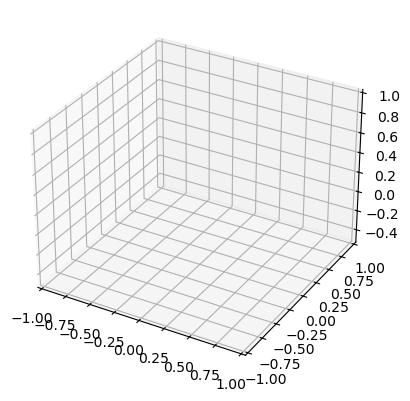

In [25]:
# Initialize lists for storing values
ee_positions = []
torques_over_time = []
velocities_over_time = []
accelerations_over_time = []

# Prepare the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-0.5, 1])


# Target angles for animation
target_angles = {
    theta1: -pi,
    theta2: -pi / 6,
    theta3: -pi / 2,
    theta4: -pi / 6,
    theta5: -pi / 6,
}

In [26]:

# Animation update function
def update(frame):
    ax.cla()
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-0.5, 1])

    if frame <= 100:
        interpolated_angles = {
            theta: float(frame * target / 100)
            for theta, target in target_angles.items()
        }
    else:
        interpolated_angles = {
            theta: float((200 - frame) * target / 100)
            for theta, target in target_angles.items()
        }

    T1 = DH_matrix(interpolated_angles[theta1], d1, a1, alpha1)
    T2 = DH_matrix(interpolated_angles[theta2], d2, a2, alpha2)
    T3 = DH_matrix(interpolated_angles[theta3], d3, a3, alpha3)
    T4 = DH_matrix(interpolated_angles[theta4], d4, a4, alpha4)
    T5 = DH_matrix(interpolated_angles[theta5], d5, a5, alpha5)

    T01 = T1
    T02 = T01 * T2
    T03 = T02 * T3
    T04 = T03 * T4
    T05 = T04 * T5

    positions = [
        Matrix([0, 0, 0, 1]),
        T01[:3, 3],
        T02[:3, 3],
        T03[:3, 3],
        T04[:3, 3],
        T05[:3, 3],
    ]
    positions = [N(p) for p in positions]

    x_vals = [p[0] for p in positions]
    y_vals = [p[1] for p in positions]
    z_vals = [p[2] for p in positions]

    ax.plot(x_vals, y_vals, z_vals, "ro-", label="Robot Arm")

    ee_positions.append(positions[-1])
    ee_trace_x = [p[0] for p in ee_positions]
    ee_trace_y = [p[1] for p in ee_positions]
    ee_trace_z = [p[2] for p in ee_positions]
    ax.plot(ee_trace_x, ee_trace_y, ee_trace_z, "b--", label="End Effector Trace")

    end_effector = positions[-1]
    ax.text(
        x_vals[-1],
        y_vals[-1],
        z_vals[-1],
        f"End Effector\nx: {end_effector[0]:.2f}, y: {end_effector[1]:.2f}, z: {end_effector[2]:.2f}",
        color="blue",
    )
    angle_texts = "\n".join(
        [
            f"{idx + 1}: {np.degrees(val):.2f}°"
            for idx, val in interpolated_angles.items()
        ]
    )
    ax.text2D(
        0.95,
        0.95,
        angle_texts,
        transform=ax.transAxes,
        color="black",
        ha="right",
        va="top",
    )
    ax.set_title("Robot Arm Configuration")
    ax.legend(loc="upper left")

    # Compute torques
    values = {
        symbols[0]: interpolated_angles[theta1],
        symbols[1]: interpolated_angles[theta2],
        symbols[2]: interpolated_angles[theta3],
        symbols[3]: interpolated_angles[theta4],
        symbols[4]: interpolated_angles[theta5],
        symbols[5]: d_1_val,
        symbols[6]: d_5_val,
        symbols[7]: a_2_val,
        symbols[8]: a_3_val,
        symbols[9]: masses[0],
        symbols[10]: masses[1],
        symbols[11]: masses[2],
        symbols[12]: masses[3],
        symbols[13]: masses[4],
        symbols[14]: external_forces[0],
        symbols[15]: external_forces[1],
        symbols[16]: external_forces[2],
        symbols[17]: external_forces[3],
        symbols[18]: external_forces[4],
        symbols[19]: external_forces[5],
        I1: I_vals[0],
        I2: I_vals[1],
        I3: I_vals[2],
        I4: I_vals[3],
        I5: I_vals[4],
    }

    tau1_num = tau1.subs(values)
    tau2_num = tau2.subs(values)
    tau3_num = tau3.subs(values)
    tau4_num = tau4.subs(values)
    tau5_num = tau5.subs(values)

    numerical_torques = [float(tau1_num), float(tau2_num), float(tau3_num), float(tau4_num), float(tau5_num)]
    torques_over_time.append((numerical_torques, interpolated_angles, positions[-1]))

    # Compute velocities and accelerations
    if frame > 0:
        previous_angles = angles[frame - 1]
        previous_velocities = velocities_over_time[-1]
        current_velocities = {
            key: (interpolated_angles[key] - previous_angles[key]) / 0.1 for key in interpolated_angles
        }
        velocities_over_time.append(current_velocities)

        current_accelerations = {
            key: (current_velocities[key] - previous_velocities[key]) / 0.1 for key in current_velocities
        }
        accelerations_over_time.append(current_accelerations)
    else:
        velocities_over_time.append({key: 0 for key in interpolated_angles})
        accelerations_over_time.append({key: 0 for key in interpolated_angles})

    torque_texts = "\n".join(
        [
            f"Torque {i + 1}: {torque:.2f} Nm"
            for i, torque in enumerate(numerical_torques)
        ]
    )
    ax.text2D(
        0.05,
        0.95,
        torque_texts,
        transform=ax.transAxes,
        color="red",
        ha="left",
        va="top",
    )


In [ ]:

# Create animation
ani = FuncAnimation(fig, update, frames=200, repeat=False)

# Save the animation
ani.save("robot_arm_animation_cycle_with_torques.gif", writer=PillowWriter(fps=10))

plt.show()

# Extract torques, angles, and positions
torques = np.array([item[0] for item in torques_over_time])
angles = [item[1] for item in torques_over_time]
positions = [item[2] for item in torques_over_time]
velocities = [item for item in velocities_over_time]
accelerations = [item for item in accelerations_over_time]

# Find and print max and min torques
max_torques = np.max(torques, axis=0)
min_torques = np.min(torques, axis=0)

print("Maximum Torques for each joint:")
for i, max_torque in enumerate(max_torques):
    print(f"Joint {i + 1}: {max_torque:.2f} Nm")

print("\nMinimum Torques for each joint:")
for i, min_torque in enumerate(min_torques):
    print(f"Joint {i + 1}: {min_torque:.2f} Nm")

# Write the data to a text file
with open("torques_data.txt", "w") as file:
    file.write("Frame\tJoint Torques (Nm)\tAngles (rad)\tEnd Effector Position (m)\tVelocities (rad/s)\tAccelerations (rad/s^2)\n")
    for frame, (torque, angle, position, velocity, acceleration) in enumerate(zip(torques_over_time, angles, positions, velocities, accelerations)):
        angle_values = [f"{angle[key]:.2f}" for key in [theta1, theta2, theta3, theta4, theta5]]
        torque_values = [f"{t:.2f}" for t in torque]
        position_values = [f"{pos:.2f}" for pos in position]
        velocity_values = [f"{velocity[key]:.2f}" for key in velocity]
        acceleration_values = [f"{acceleration[key]:.2f}" for key in acceleration]
        file.write(
            f"{frame}\t{', '.join(torque_values)}\t{', '.join(angle_values)}\t{', '.join(position_values)}\t{', '.join(velocity_values)}\t{', '.join(acceleration_values)}\n"
        )

# Plot the torques over time for each joint
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(torques[:, i], label=f"Joint {i+1} Torque")
plt.xlabel("Frame")
plt.ylabel("Torque (Nm)")
plt.title("Joint Torques Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot the velocities over time for each joint
plt.figure(figsize=(10, 6))
for i, theta in enumerate([theta1, theta2, theta3, theta4, theta5]):
    plt.plot([v[theta] for v in velocities], label=f"Joint {i+1} Velocity")
plt.xlabel("Frame")
plt.ylabel("Velocity (rad/s)")
plt.title("Joint Velocities Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot the accelerations over time for each joint
plt.figure(figsize=(10, 6))
for i, theta in enumerate([theta1, theta2, theta3, theta4, theta5]):
    plt.plot([a[theta] for a in accelerations], label=f"Joint {i+1} Acceleration")
plt.xlabel("Frame")
plt.ylabel("Acceleration (rad/s^2)")
plt.title("Joint Accelerations Over Time")
plt.legend()
plt.grid(True)
plt.show()